# Import library and mount data from drive.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix,roc_auc_score
# from sklearn.metrics import plot_confusion_matrix,roc_auc_score
# import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
# import datetime as dt
# from geopy.distance import great_circle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic understanding of data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Vintage: All members are associated are less than 1 year. maximum is 299 days and minimum is 10 days.
Age: Maximum age is 85.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


No null values

In [ ]:
df.dtypes[df.dtypes=='object']

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

In [ ]:
df['Policy_Sales_Channel'].sort_values(ascending=False)

In [ ]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].astype('category')

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  category
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  int64   
 4   Region_Code           381109 non-null  float64 
 5   Previously_Insured    381109 non-null  int64   
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  category
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  float64 
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  int64   
dtypes: category(3), float64(3), int64(6)
memory usage: 27.3 MB


# Univariate Analysis

Let us see how gender is distributed 

In [ ]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

In [ ]:
df['Driving_License'].value_counts(normalize=True)

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [ ]:
df['Response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

1. Minimum age is 20 and most of the people have driving license.
We have to see why this people are not making their driving license.

2. 99% associated have DL.
3. 88% associates are responding negatively towards vehical insurance.

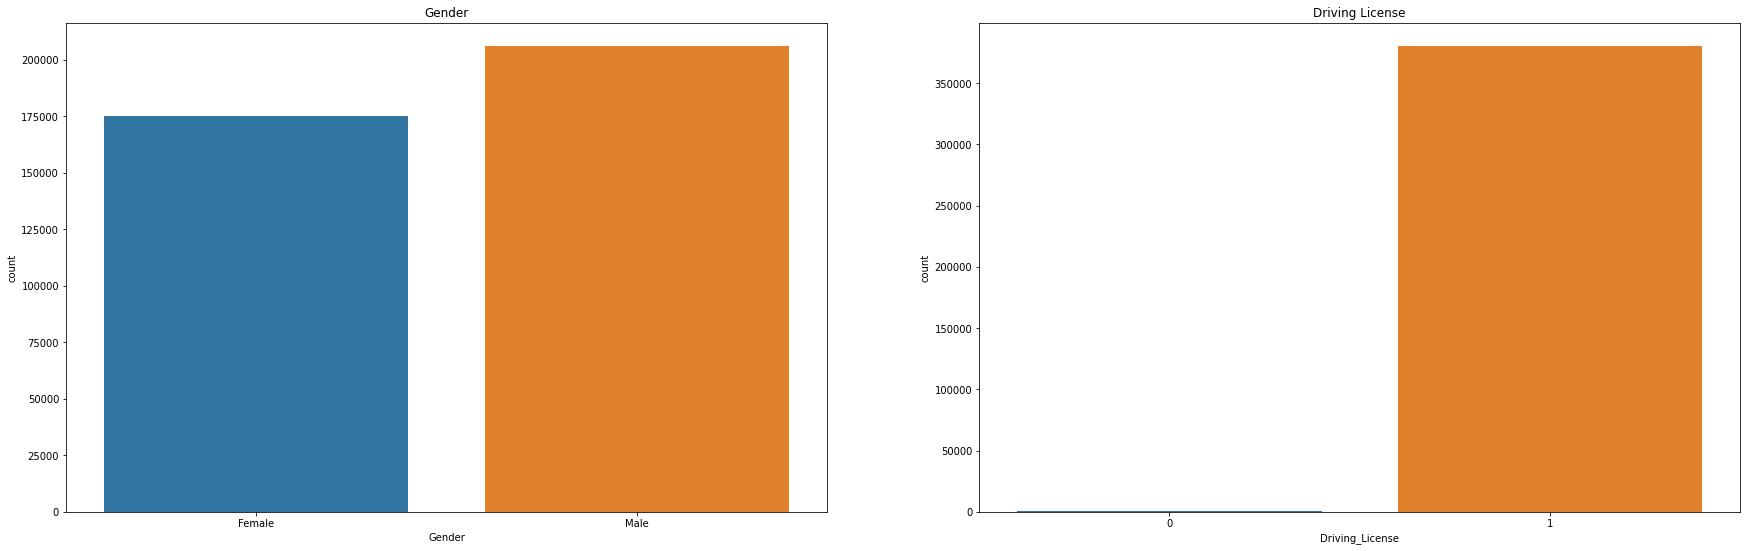

In [ ]:
figure,(ax1, ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title('Gender')
ax = sns.countplot(x='Gender', data=df, ax=ax1)
ax2.set_title('Driving License')
ax = sns.countplot(x='Driving_License', data=df, ax=ax2)

In [ ]:
df['Region_Code'].value_counts(ascending=False)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

Region code "28" has highest number of people associated with the company. 8, 46, 4, 1, 15, 30, 29, 50 has customers more than 10k.
Most of the people have no Driving license.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

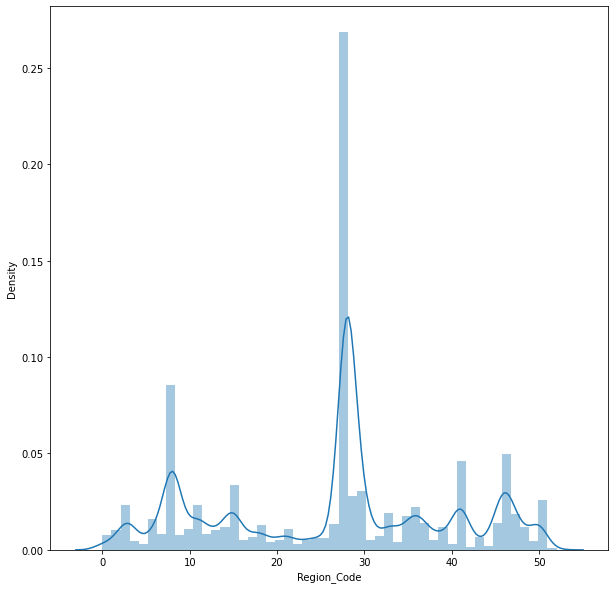

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['Region_Code'])

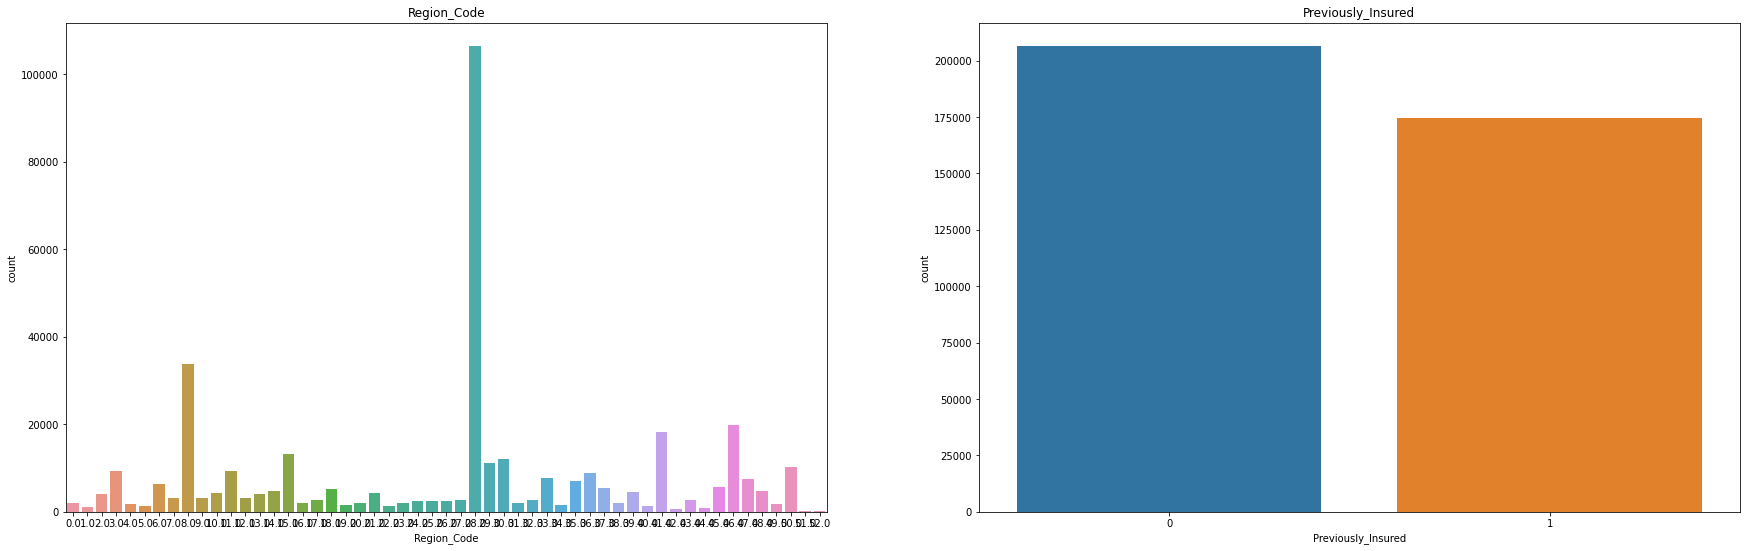

In [ ]:
figure,(ax1, ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title('Region_Code')
ax = sns.countplot(x='Region_Code', data=df, ax=ax1)
ax2.set_title('Previously_Insured')
ax = sns.countplot(x='Previously_Insured', data=df, ax=ax2)

In [ ]:
df[(df['Region_Code']==8) & (df['Previously_Insured']==0)]['id'].value_counts()

139260    1
215751    1
203558    1
295717    1
303254    1
         ..
132634    1
333336    1
355863    1
347077    1
331778    1
Name: id, Length: 16770, dtype: int64

C:\Users\Ashish\Anaconda3\envs\py377\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

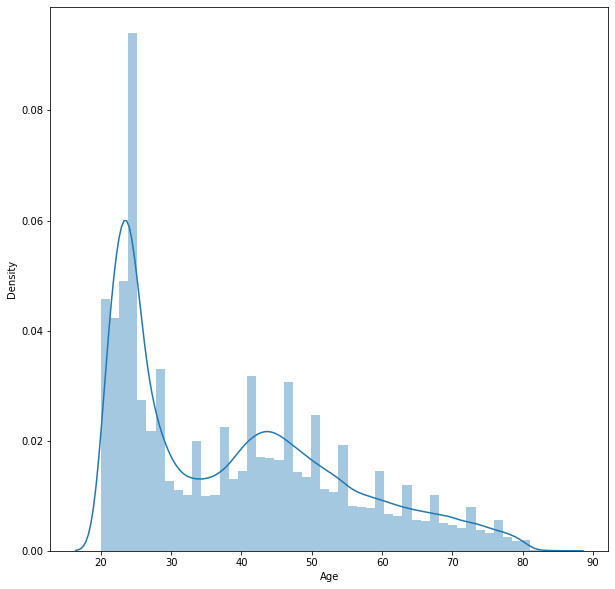

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['Age'])

In [ ]:
df[(df['Age']<=25) & (df['Driving_License']==1)]['id']

3              4
5              6
6              7
8              9
11            12
           ...  
381088    381089
381089    381090
381093    381094
381102    381103
381106    381107
Name: id, Length: 114503, dtype: int64

In [ ]:
df[(df['Age']<=25) & (df['Previously_Insured']==1)]['id']

3              4
8              9
11            12
17            18
22            23
           ...  
381069    381070
381087    381088
381093    381094
381102    381103
381106    381107
Name: id, Length: 73335, dtype: int64

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df[df['Annual_Premium']>100000].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,190035.005141,42.650386,0.996144,26.318766,0.438303,146870.661954,100.466581,155.980720,0.158098
std,107865.021660,16.825125,0.062017,10.094339,0.496498,75055.458140,56.411496,85.070073,0.365067
min,177.000000,20.000000,0.000000,3.000000,0.000000,100018.000000,3.000000,10.000000,0.000000
25%,95393.750000,26.000000,1.000000,28.000000,0.000000,105837.500000,26.000000,83.250000,0.000000
50%,188166.000000,42.000000,1.000000,28.000000,0.000000,114815.000000,124.000000,155.000000,0.000000
75%,283722.250000,55.750000,1.000000,28.000000,1.000000,144410.750000,152.000000,232.000000,0.000000
max,380999.000000,80.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


1. Associates that are paying annual premium above 1L.
2. All associates have DL.
3. Mean age 42 and Minimum age is 20.
4. 50% associated have not bought insurance previously.
5. Mean vintage day is 155 days, it is good sign.
6. But with all these positive signs, their response to vehicle insurance is negative, as we can see 3rd quartile value is 0, means 75% people are saying NO to vehical insurance.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

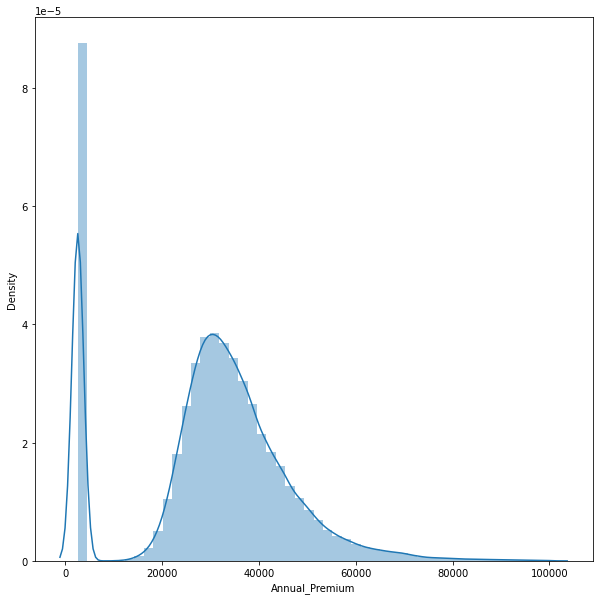

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['Annual_Premium']<100000]['Annual_Premium'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

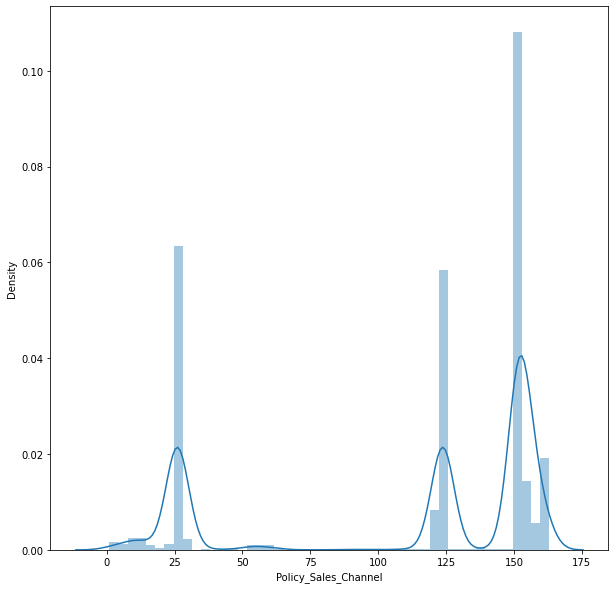

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['Policy_Sales_Channel'])

In [ ]:
df['Policy_Sales_Channel'].value_counts(ascending=False).head(8)

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
Name: Policy_Sales_Channel, dtype: int64

In [ ]:
df.shape

(381109, 12)

Few channels are working very good. We have to see why they are working well, and implement same stategy with other channel so that they are also working well.

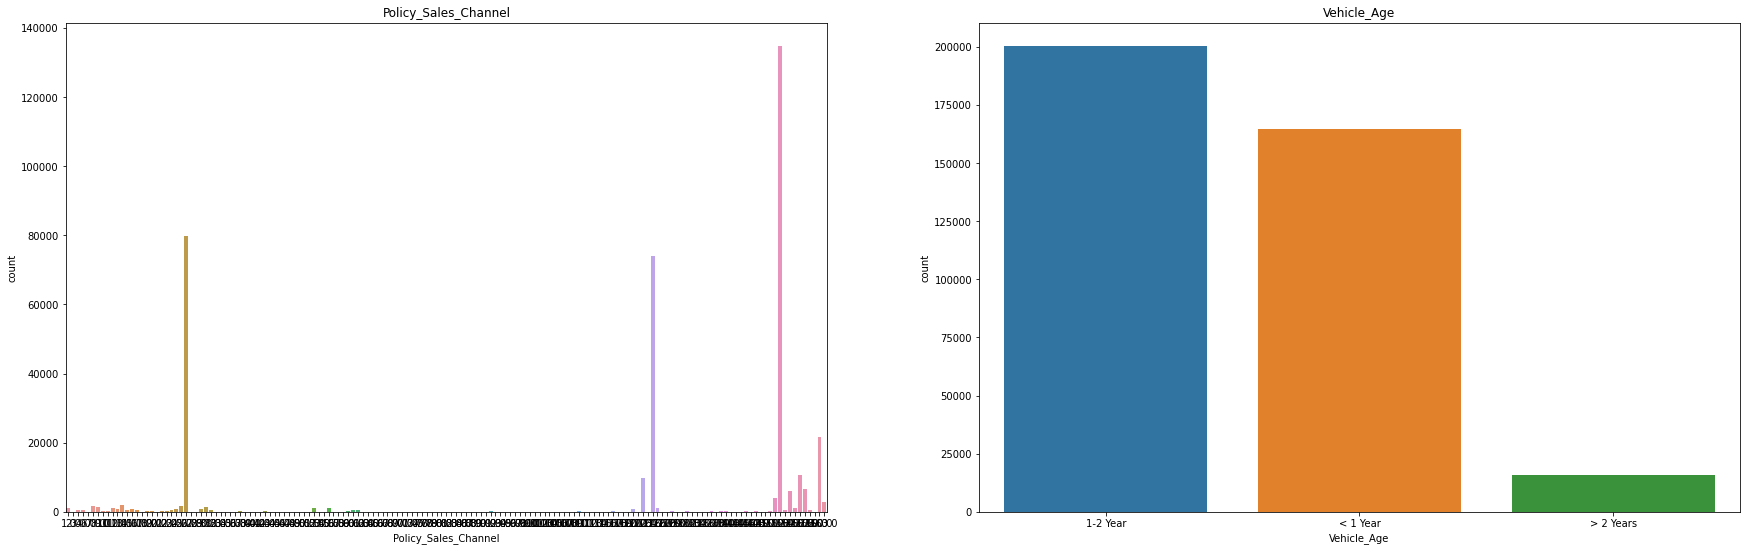

In [ ]:
figure,(ax1, ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title('Policy_Sales_Channel')
ax = sns.countplot(x='Policy_Sales_Channel', data=df, ax=ax1)
ax2.set_title('Vehicle_Age')
ax = sns.countplot(x='Vehicle_Age', data=df, ax=ax2)

Most of the vehicles are between 1-2 year and less than 1 year.

C:\Users\Ashish\Anaconda3\envs\py377\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

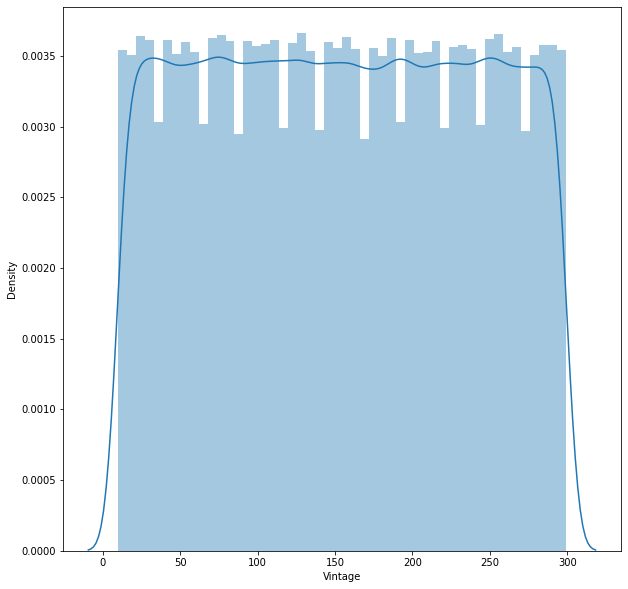

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['Vintage'])

Almost same density.

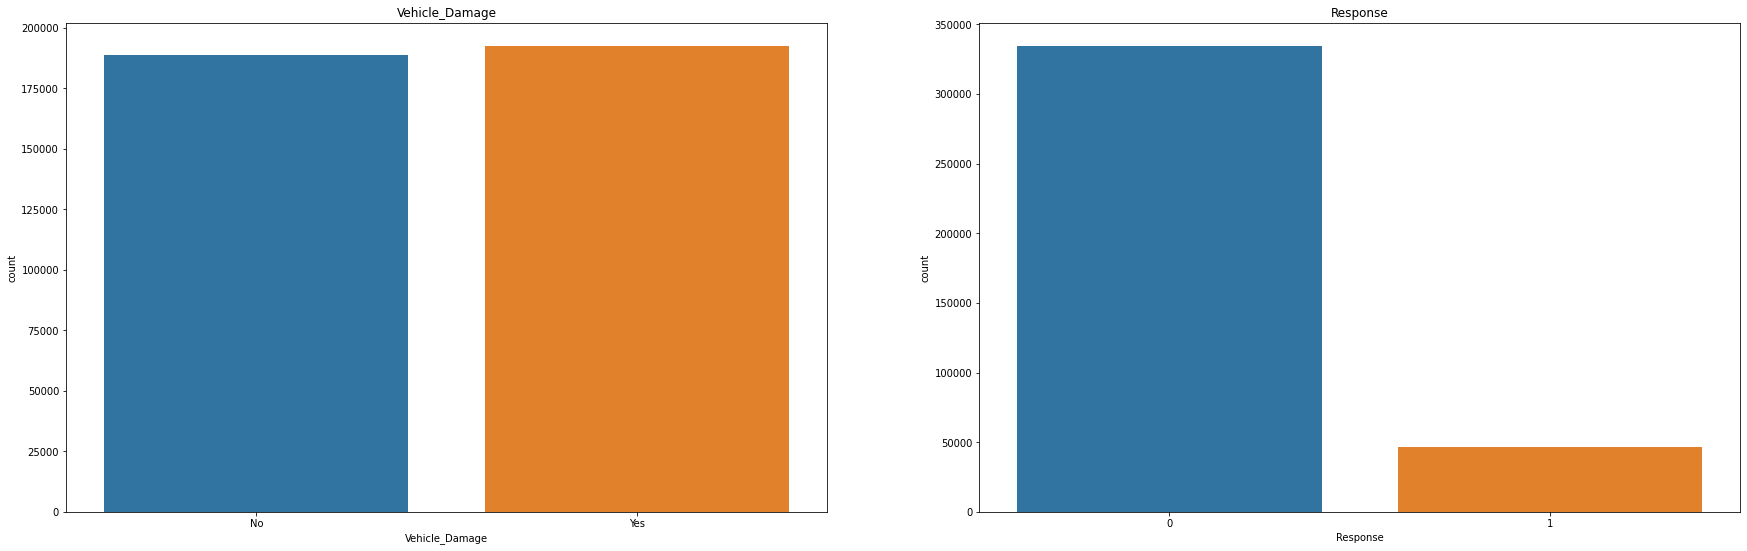

In [ ]:
figure,(ax1, ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title('Vehicle_Damage')
ax = sns.countplot(x='Vehicle_Damage', data=df, ax=ax1)
ax2.set_title('Response')
ax = sns.countplot(x='Response', data=df, ax=ax2)

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# Bivariate Analysis

<AxesSubplot:xlabel='Driving_License', ylabel='Age'>

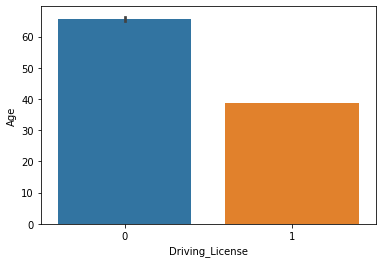

In [ ]:
sns.barplot(y='Age', x='Driving_License', data=df)

1. Average age of people have not DL is more than average age of people having DL.

<AxesSubplot:xlabel='Driving_License', ylabel='Annual_Premium'>

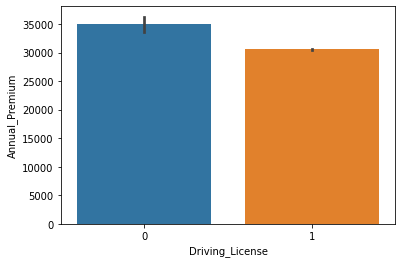

In [ ]:
sns.barplot(y='Annual_Premium', x='Driving_License', data=df)

Both having DL and not DL, are paying almost same annual premiun.

<AxesSubplot:xlabel='Driving_License', ylabel='Vintage'>

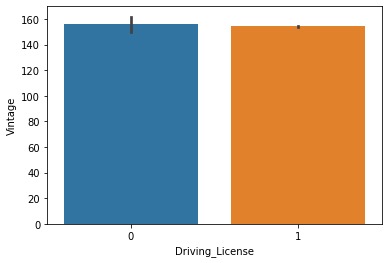

In [ ]:
sns.barplot(y='Vintage', x='Driving_License', data=df)

Both have or not have DL, are associated with the company same average days.

<AxesSubplot:xlabel='Response', ylabel='Age'>

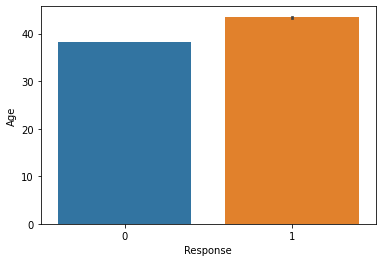

In [ ]:
sns.barplot(y='Age', x='Response', data=df)

Associates responding positively has more average age.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

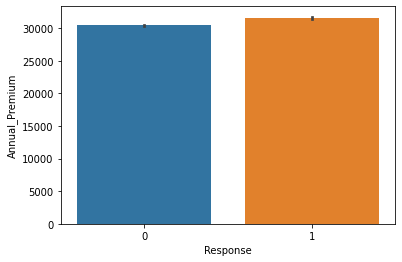

In [ ]:
sns.barplot(y='Annual_Premium', x='Response', data=df)

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

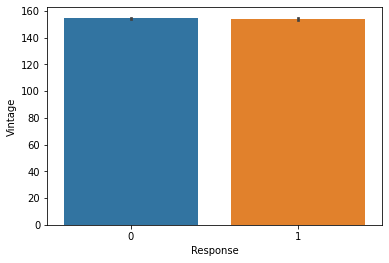

In [ ]:
sns.barplot(y='Vintage', x='Response', data=df)

As data is imbalanced, still with NO response associates has same average vintage days compare to average vintage days of YES response.

<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

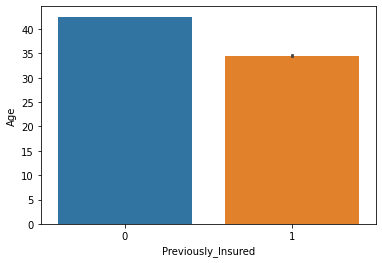

In [ ]:
sns.barplot(y='Age', x='Previously_Insured', data=df)

<AxesSubplot:xlabel='Driving_License,Response'>

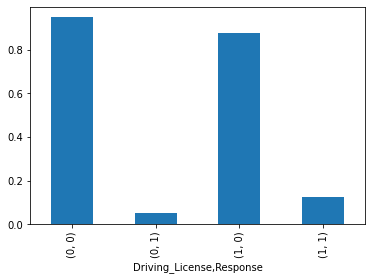

In [ ]:
df.groupby(['Driving_License'])['Response'].value_counts(normalize=True).plot.bar()

In [ ]:
df.groupby(['Driving_License'])['Response'].value_counts(normalize=True)

Driving_License  Response
0                0           0.949507
                 1           0.050493
1                0           0.877283
                 1           0.122717
Name: Response, dtype: float64

1. The associates have DL or not is not affecting the response, in both the cases(DL holding or not) response is NO.

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
df.groupby(['Previously_Insured'])['Response'].value_counts(normalize=True)

Previously_Insured  Response
0                   0           0.774546
                    1           0.225454
1                   0           0.999095
                    1           0.000905
Name: Response, dtype: float64

<AxesSubplot:xlabel='Previously_Insured,Response'>

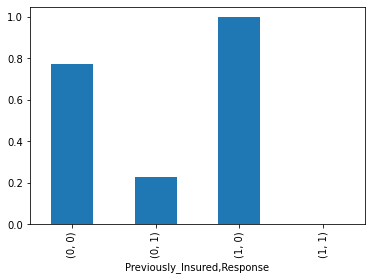

In [ ]:
df.groupby(['Previously_Insured'])['Response'].value_counts(normalize=True).plot.bar()

As data is imbalanced, some has bought insurance previously but they are not interest in vehicle insurance(third bar in above graph). 
The one that does not purchased insurance previously are interest, we can target them(Second bar in above graph)

<AxesSubplot:xlabel='Gender,Response'>

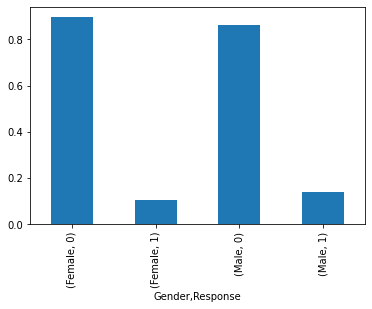

In [ ]:
df.groupby(['Gender'])['Response'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='Vehicle_Damage,Response'>

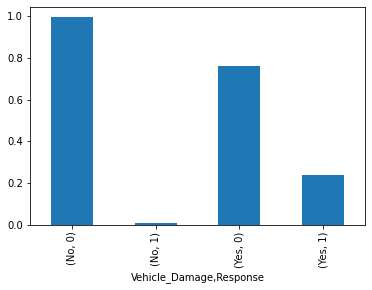

In [ ]:
df.groupby(['Vehicle_Damage'])['Response'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='Vehicle_Age,Response'>

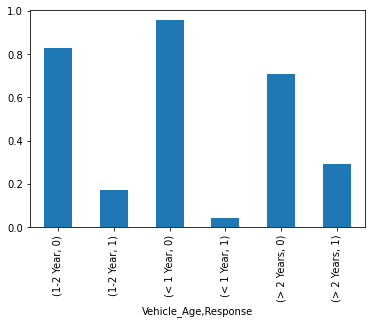

In [ ]:
df.groupby(['Vehicle_Age'])['Response'].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='Response'>

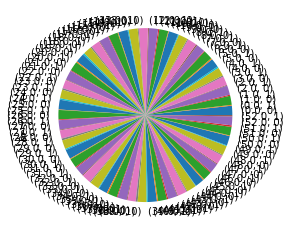

In [ ]:
df.groupby(['Region_Code'])['Response'].value_counts(normalize=True).plot.pie()

In [ ]:
df1 = df.groupby(['Region_Code'])[['Response','id']]

In [ ]:
list(df1)

# Multivariate Analysis

In [ ]:
corr = df.corr()

<AxesSubplot:>

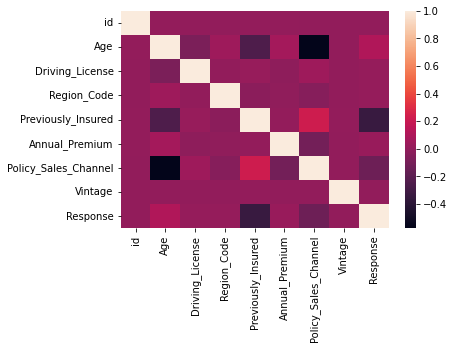

In [ ]:
sns.heatmap(corr)

# Encoding of categorical feature

In [ ]:
df['Vehicle_Age'].unique()

['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['1-2 Year', '< 1 Year', '> 2 Years']

In [ ]:
df['Vehicle_Age_1'] = df['Vehicle_Age'].replace(['> 2 Years', '1-2 Year', '< 1 Year'], [1,2,0])

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1,Gender_1
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,1,0
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,2,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,1,0
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0,1


In [ ]:
df['Gender_1'] = df['Gender'].replace(['Male', 'Female'], [0,1])

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['Yes','No'], [1,0])

In [ ]:
data = df.drop(['Gender', 'Vehicle_Age'], axis =1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Damage        381109 non-null  int64  
 6   Annual_Premium        381109 non-null  float64
 7   Policy_Sales_Channel  381109 non-null  float64
 8   Vintage               381109 non-null  int64  
 9   Response              381109 non-null  int64  
 10  Vehicle_Age_1         381109 non-null  int64  
 11  Gender_1              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [ ]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1,Gender_1
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,1,0
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,2,0
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,1,0
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,0
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,0,1


In [ ]:
data.shape

(381109, 12)

## One Hot Encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Policy_Sales_Channel', 'Region_Code'])

In [ ]:
one_hot_encoded_data.columns

Index(['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response', 'Vehicle_Age_1', 'Gender_1',
       ...
       'Region_Code_43.0', 'Region_Code_44.0', 'Region_Code_45.0',
       'Region_Code_46.0', 'Region_Code_47.0', 'Region_Code_48.0',
       'Region_Code_49.0', 'Region_Code_50.0', 'Region_Code_51.0',
       'Region_Code_52.0'],
      dtype='object', length=218)

In [ ]:
df_final = one_hot_encoded_data[['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response', 'Vehicle_Age_1', 'Gender_1', 'Policy_Sales_Channel_152.0','Policy_Sales_Channel_26.0','Policy_Sales_Channel_124.0','Policy_Sales_Channel_160.0','Policy_Sales_Channel_156.0','Policy_Sales_Channel_122.0','Policy_Sales_Channel_157.0','Policy_Sales_Channel_154.0' , 'Region_Code_8.0', 'Region_Code_46.0','Region_Code_41.0','Region_Code_15.0','Region_Code_30.0', 'Region_Code_29.0', 'Region_Code_50.0' ]]

In [ ]:
df_final['Policy_Sales_Channel_152_26_124'] = df_final['Policy_Sales_Channel_152.0'] +df_final['Policy_Sales_Channel_26.0'] + df_final['Policy_Sales_Channel_124.0']

In [ ]:
df_final.head()

## Understanding the correlation heatmap after one hot encoding.

In [ ]:
df_final =df_final.drop(['Policy_Sales_Channel_160.0'], axis=1)

In [ ]:
df_final.shape

(381109, 18)

In [ ]:
corr_df_final = df_final.corr()

<AxesSubplot:>

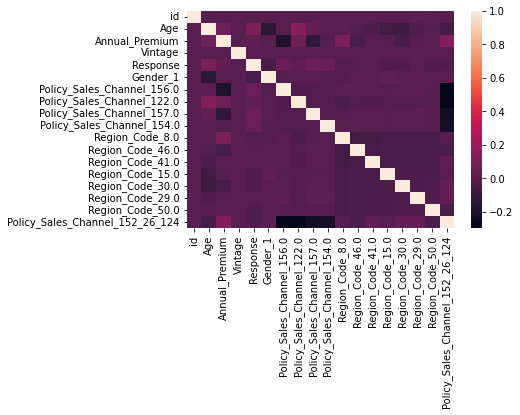

In [ ]:
sns.heatmap(corr_df_final)

In [ ]:
X = df_final
calc_vif(X)


,variables,VIF
0,id,3.512936
1,Age,5.552125
2,Annual_Premium,4.083448
3,Vintage,3.790596
4,Response,1.169828
5,Gender_1,1.759219
6,Policy_Sales_Channel_156.0,1.139704
7,Policy_Sales_Channel_122.0,1.185283
8,Policy_Sales_Channel_157.0,1.094997
9,Policy_Sales_Channel_154.0,1.078910


<AxesSubplot:xlabel='Policy_Sales_Channel_152.0', ylabel='Age'>

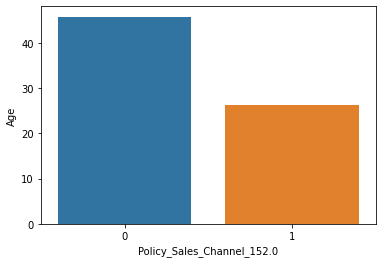

In [ ]:
sns.barplot(y='Age', x='Policy_Sales_Channel_152.0', data=df_final)

# Modelling

## Scaling

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               381109 non-null  int64  
 1   Age                              381109 non-null  int64  
 2   Annual_Premium                   381109 non-null  float64
 3   Vintage                          381109 non-null  int64  
 4   Response                         381109 non-null  int64  
 5   Gender_1                         381109 non-null  int64  
 6   Policy_Sales_Channel_156.0       381109 non-null  uint8  
 7   Policy_Sales_Channel_122.0       381109 non-null  uint8  
 8   Policy_Sales_Channel_157.0       381109 non-null  uint8  
 9   Policy_Sales_Channel_154.0       381109 non-null  uint8  
 10  Region_Code_8.0                  381109 non-null  uint8  
 11  Region_Code_46.0                 381109 non-null  uint8  
 12  Re

In [ ]:
numerical_cols = ['Age', 'Annual_Premium', 'Vintage', ] 
sc = StandardScaler()
df_final[numerical_cols] = sc.fit_transform(df_final[numerical_cols])

In [ ]:
df_final.head()

,id,Age,Annual_Premium,Vintage,Response,Gender_1,Policy_Sales_Channel_156.0,Policy_Sales_Channel_122.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_154.0,Region_Code_8.0,Region_Code_46.0,Region_Code_41.0,Region_Code_15.0,Region_Code_30.0,Region_Code_29.0,Region_Code_50.0,Policy_Sales_Channel_152_26_124
0,1,0.333777,0.574539,0.748795,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2.396751,0.172636,0.342443,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0.527181,0.449053,-1.521998,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,-1.148985,-0.113018,0.581474,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,-0.633242,-0.178259,-1.378580,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
df_final.columns

Index(['id', 'Age', 'Annual_Premium', 'Vintage', 'Response', 'Gender_1',
       'Policy_Sales_Channel_156.0', 'Policy_Sales_Channel_122.0',
       'Policy_Sales_Channel_157.0', 'Policy_Sales_Channel_154.0',
       'Region_Code_8.0', 'Region_Code_46.0', 'Region_Code_41.0',
       'Region_Code_15.0', 'Region_Code_30.0', 'Region_Code_29.0',
       'Region_Code_50.0', 'Policy_Sales_Channel_152_26_124'],
      dtype='object')

## train test split

In [ ]:
X = df_final[['Age', 'Annual_Premium', 'Vintage', 'Gender_1', 'Policy_Sales_Channel_156.0', 'Policy_Sales_Channel_122.0', 'Policy_Sales_Channel_157.0', 'Policy_Sales_Channel_154.0','Region_Code_8.0', 'Region_Code_46.0', 'Region_Code_41.0','Region_Code_15.0', 'Region_Code_30.0', 'Region_Code_29.0','Region_Code_50.0', 'Policy_Sales_Channel_152_26_124']]

In [ ]:
y = df_final[['Response']]

In [ ]:
len(y)

381109

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.3, random_state=5, stratify=y)

## Decision Tree classifier

In [ ]:
len(X_train1)

266776

In [ ]:
len(y_test1)

114333

In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = model.predict(X_test1)

In [ ]:
len(y_pred)

114333

In [ ]:
accuracy_score(y_test1, y_pred)

0.7931918168857636

In [ ]:
confusion_matrix(y_test1, y_pred)

array([[87977, 12343],
       [11302,  2711]])

In [ ]:
classification_report(y_test1, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.88      0.88    100320\n           1       0.18      0.19      0.19     14013\n\n    accuracy                           0.79    114333\n   macro avg       0.53      0.54      0.53    114333\nweighted avg       0.80      0.79      0.80    114333\n'

In [ ]:
roc_auc_score(y_test1, y_pred)

0.5352134644197442

# Understanding the correlation heatmap before one hot encoding.

In [ ]:
corr_data = data.corr()

<AxesSubplot:>

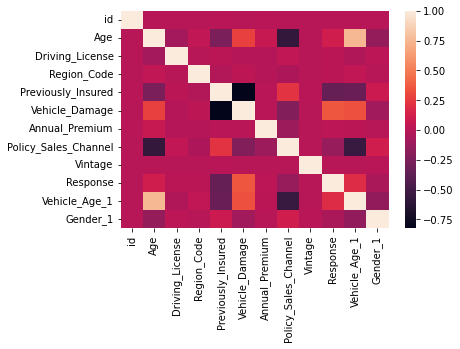

In [ ]:
sns.heatmap(corr_data)

In [ ]:
data.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Vehicle_Age_1', 'Gender_1'],
      dtype='object')

<AxesSubplot:xlabel='Vehicle_Age_1,Previously_Insured'>

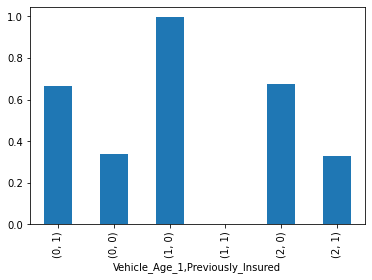

In [ ]:
df.groupby(['Vehicle_Age_1'])['Previously_Insured'].value_counts(normalize=True).plot.bar()

In [ ]:
df.groupby(['Vehicle_Age_1'])['Previously_Insured'].value_counts(normalize=True)

Vehicle_Age_1  Previously_Insured
0              1                     0.663024
               0                     0.336976
1              0                     0.997126
               1                     0.002874
2              0                     0.673890
               1                     0.326110
Name: Previously_Insured, dtype: float64

In [ ]:
df.groupby(['Previously_Insured'])['Vehicle_Age_1'].value_counts(normalize=True)

Previously_Insured  Vehicle_Age_1
0                   2                0.653770
                    0                0.268930
                    1                0.077300
1                   0                0.625656
                    2                0.374081
                    1                0.000263
Name: Vehicle_Age_1, dtype: float64

In [ ]:
data['Vehicle_Age_1'].value_counts()

2    200316
0    164786
1     16007
Name: Vehicle_Age_1, dtype: int64

New purchased vehicle has bought insurance previously. Vehicle age between 1 and 2 year somebody has bought some not. Vehicle age more 2 years has not bought insurance previouly.

<AxesSubplot:xlabel='Vehicle_Damage,Previously_Insured'>

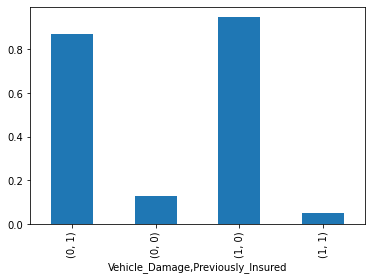

In [ ]:
df.groupby(['Vehicle_Damage'])['Previously_Insured'].value_counts(normalize=True).plot.bar()

In [ ]:
df.groupby(['Previously_Insured'])['Vehicle_Damage'].value_counts(normalize=True)

Previously_Insured  Vehicle_Damage
0                   1                 0.883815
                    0                 0.116185
1                   0                 0.943182
                    1                 0.056818
Name: Vehicle_Damage, dtype: float64

1. Not bought insurance previously and vehicle are damage are responding 
positively.
2. Bought insurance previously but vehicle is not damaged then, they are reponding NO.
3. The one who has bought insurance has very less number of vehicle damage cases.



<AxesSubplot:xlabel='Vehicle_Age_1', ylabel='Age'>

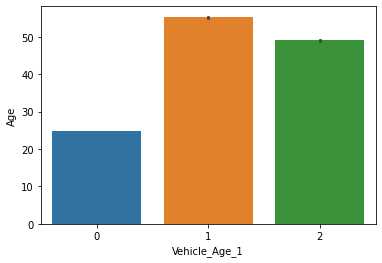

In [ ]:
sns.barplot(y='Age', x='Vehicle_Age_1', data=data)

1. New vehicle are mostly with the young age people.
2. Gradually as vehicle age is increasing, age of associate is increasing.

<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

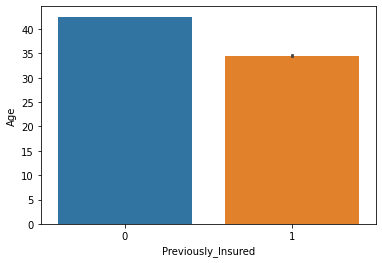

In [ ]:
sns.barplot(y='Age', x='Previously_Insured', data=data)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Age'>

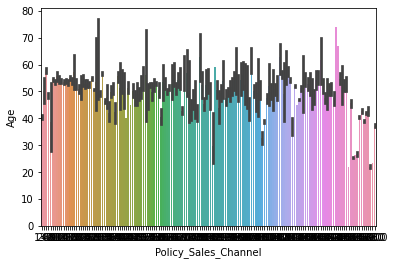

In [ ]:
sns.barplot(y='Age', x='Policy_Sales_Channel', data=data)

# Calculate VIF score

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
data_12 = data.drop(['Response'], axis = 1)

In [ ]:
X = data_12
calc_vif(X)


In [ ]:
data_123 = data.drop(['Vehicle_Damage','Age','Response'], axis = 1)

In [ ]:
X = data_123
calc_vif(X)

In [ ]:
corr_data_1 = data_123.corr()

In [ ]:
sns.heatmap(corr_data_123)

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Policy_Sales_Channel', 'Region_Code'])


In [ ]:
one_hot_encoded_data.head()

In [ ]:
corr_one_hot_encoded_data = one_hot_encoded_data.corr()

In [ ]:
sns.heatmap(corr_one_hot_encoded_data)

In [ ]:
data.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Gender_1'],
      dtype='object')

In [ ]:
data['Mean_Premium_Damage'] = data.groupby(by=['Vehicle_Damage'])['Annual_Premium'].transform('mean')

In [ ]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_1,Mean_Premium_Damage
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,30723.758171
1,2,76,1,3.0,0,0,33536.0,26.0,183,0,0,30401.881693
2,3,47,1,28.0,0,1,38294.0,26.0,27,1,0,30723.758171
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,30401.881693
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,1,30401.881693


In [ ]:
data['Mean_Premium_Damage'].nunique()

2